OBJECT_Detection using CV2

In [2]:
!pip install opencv-python
import cv2

  Using cached opencv_python-4.5.5.62-cp36-abi3-macosx_10_15_x86_64.whl (46.0 MB)
  Using cached numpy-1.22.2-cp38-cp38-macosx_10_14_x86_64.whl (17.6 MB)
You should consider upgrading via the '/Users/anupraut/Desktop/Simple_object_detection/bin/python3 -m pip install --upgrade pip' command.


In [5]:
!pip install matplotlib


You should consider upgrading via the '/Users/anupraut/Desktop/Simple_object_detection/bin/python3 -m pip install --upgrade pip' command.


In [4]:
import matplotlib.pyplot as plt

In [6]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [8]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [14]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ##255/2
model.setInputMean((127.5,127.5,127.5)) ##mobilenet => [-1,-1]
model.setInputSwapRB(True)

<dnn_Model 0x124629ab0>

In [9]:
classlabels = []
file_name = 'text.txt'
with open(file_name,'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

In [11]:
print(classlabels)
print(len(classlabels))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


Reading an Image

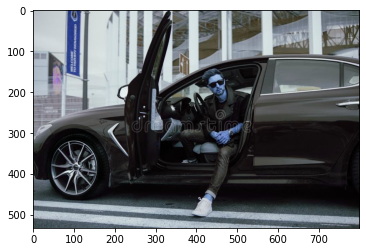

In [12]:
img = cv2.imread('image.jpeg')
plt.imshow(img) #bgr image

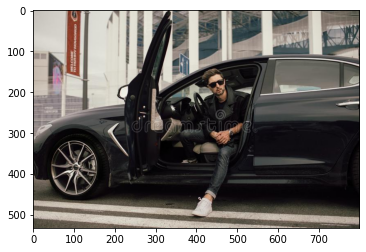

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [15]:
ClassIndex , confidence , bbox = model.detect(img,confThreshold=0.5)

In [17]:
print(ClassIndex)
print(confidence)

[1 3]
[0.74428785 0.7030254 ]


From ClassLabels, we can see that , 1 and 3 are car and a man thats what 1, 3 indexes.

In [20]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for classind, conf, boxes in zip(ClassIndex,confidence,bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classlabels[classind-1],(boxes[0]+10,boxes[1]+40),font,fontScale = font_scale,thickness = 3,color = (255,155,155))

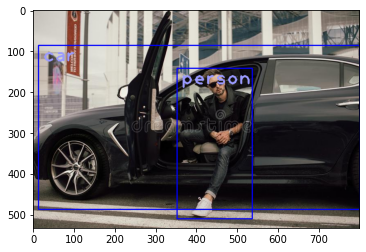

In [22]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))